http://stackoverflow.com/questions/9876290/how-do-i-compute-derivative-using-numpy

### Протабулировать функцию Гаусса:
f(x) = 1./((sqrt(2.*pi)*s)*e**(-0.5*((x-m)/s)**2) на отрезке (-10,10) для m = 0 и различных s. (s пусть будет от 0.5 до 5)

Вычислить производную и интеграл от этой функции с помощью метода конечных разностей без применения циклов. 

Построить графики для данной функции и ее производной.
Использовать numpy и matplotlib.

In [55]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

def f(x,s,m):
    return (1./(sqrt(2.*pi)*s))*e**(-0.5*((x-m)/s)**2)

def main():
    m = 0
    s = np.linspace(0.5,5,1)
    x = np.linspace(-10,10,20)
    y = np.zeros(np.shape(x))
    for i in range(len(s)):
        print('s = ', s)
        for j in range(len(x)):
            y[j] = f(x[j],s,m)
            print('x = ',x[j],', y = ',y[j])

In [56]:
main()

('s = ', array([ 0.5]))
('x = ', -10.0, ', y = ', 1.1041896724319645e-87)
('x = ', -8.9473684210526319, ', y = ', 2.3264926495190639e-70)
('x = ', -7.8947368421052637, ', y = ', 5.8278558258428936e-55)
('x = ', -6.8421052631578947, ', y = ', 1.7356614776083347e-41)
('x = ', -5.7894736842105265, ', y = ', 6.1456859052397489e-30)
('x = ', -4.7368421052631584, ', y = ', 2.5871690495313523e-20)
('x = ', -3.6842105263157894, ', y = ', 1.2948765453766929e-12)
('x = ', -2.6315789473684212, ', y = ', 7.7051488395092065e-07)
('x = ', -1.5789473684210531, ', y = ', 0.0054510832034328858)
('x = ', -0.52631578947368496, ', y = ', 0.45849404602289129)
('x = ', 0.52631578947368318, ', y = ', 0.45849404602289295)
('x = ', 1.5789473684210513, ', y = ', 0.0054510832034329482)
('x = ', 2.6315789473684212, ', y = ', 7.7051488395092065e-07)
('x = ', 3.6842105263157894, ', y = ', 1.2948765453766929e-12)
('x = ', 4.7368421052631575, ', y = ', 2.5871690495313887e-20)
('x = ', 5.7894736842105257, ', y = ', 6.

### Simple Derivative

In [95]:
class Derivative:
    def __init__(self, f, h=1E-9):
        self.f = f
        self.h = np.float128(h)

    def __call__(self, x):
        f, h = self.f, self.h
        return (f(x+h) - f(x))/h

In [96]:
df = Derivative(sin)
df(x=np.pi)


-1.00000008274037

### using SymPy

In [97]:
from sympy import *
import numpy as np
x = Symbol('x')
y = sin(x)
yprime = y.diff(x)
print yprime

df = lambdify(x, yprime, 'numpy')
print df(np.pi)

cos(x)
-1.0


### using scipy

In [98]:
from scipy.misc import derivative

In [109]:
y = sin
derivative(y, np.pi, dx=1e-6)

-1.00000000013961

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.fftpack import diff as psdiff

"""
The Korteweg-de Vries equation (KdV equation for short) is a
mathematical model of waves on shallow water surfaces.
The KdV equation has several connections to physical problems. 
In addition to being the governing equation of the string in the 
Fermi-Pasta-Ulam problem in the continuum limit, it approximately 
describes the evolution of long, one-dimensional waves in many 
physical settings, including:
 * shallow-water waves with weakly non-linear restoring forces,
 * long internal waves in a density-stratified ocean,
 * ion acoustic waves in a plasma,
 * acoustic waves on a crystal lattice.
"""

#http://www.scipy.org/Cookbook/KdV
def kdv_exact(x, c):
    """
    Profile of the exact solution to the KdV for a single soliton on the 
    real line."""
    u = 0.5*c*np.cosh(0.5*np.sqrt(c)*x)**(-2)
    return u

def kdv(u, t, L):
    """Differential equations for the KdV equation, discretized in x."""
    # Compute the x derivatives using the pseudo-spectral method.
    ux = psdiff(u, period=L)
    uxxx = psdiff(u, period=L, order=3)
    
    # Compute du/dt.    
    dudt = -6*u*ux - uxxx
    
    return dudt

def kdv_solution(u0, t, L):
    """Use odeint to solve the KdV equation on a periodic domain.
    
    `u0` is initial condition, `t` is the array of time values at which
    the solution is to be computed, and `L` is the length of the periodic
    domain."""
    
    sol = odeint(kdv, u0, t, args=(L,), mxstep=5000)
    return sol

In [27]:
# Set the size of the domain, and create the discretized grid.
L = 50.0
N = 64
dx = L / (N - 1.0)
x = np.linspace(0, (1-1.0/N)*L, N)

# Set the initial conditions.
# Not exact for two solitons on a periodic domain, but close enough...
u0 = kdv_exact(x-0.33*L, 0.75) + kdv_exact(x-0.65*L, 0.4)

# Set the time sample grid.
T = 300
t = np.linspace(0, T, 501)

print "Computing the solution."
sol = kdv_solution(u0, t, L)

Computing the solution.


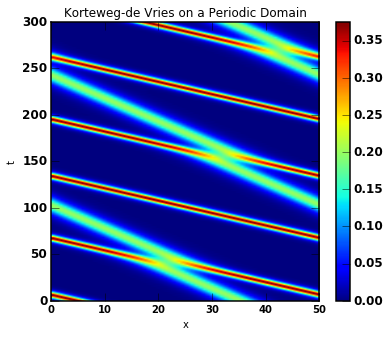

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.imshow(sol, extent=[0,L,0,T])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.axis('normal')
plt.title('Korteweg-de Vries on a Periodic Domain')